## 9.1 图像增广

In [1]:
%matplotlib inline
import d2lzh as d2l
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import numpy as np
import scipy
import sys
import time

/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

9.1.1. 常用的图像增广方法

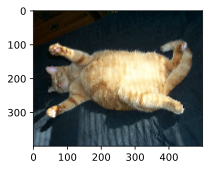

In [41]:
d2l.set_figsize()
img = plt.imread('../img/cat1.jpg')
d2l.plt.imshow(img)

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
def apply(img, gen, num_rows=2, num_cols=4, scale=1.5):
    iter = gen.flow(np.array([img]))
    Y = [iter.next()[0].astype(int) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

### 9.1.1.1 翻转和裁剪

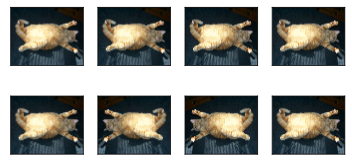

In [44]:
# 左右翻转
datagen = ImageDataGenerator(horizontal_flip=True)
apply(img, datagen)

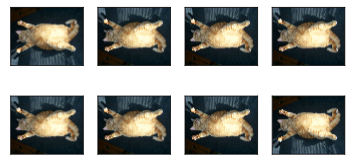

In [45]:
# 上下翻转
datagen = ImageDataGenerator(vertical_flip=True)
apply(img, datagen)

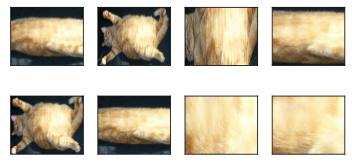

In [46]:
# 裁剪
datagen = ImageDataGenerator(zoom_range=(0.1, 1))
apply(img, datagen)

### 9.1.1.2 变化颜色

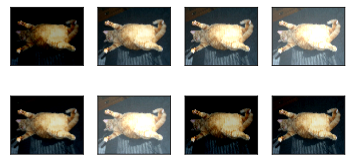

In [47]:
# 通道移动
datagen = ImageDataGenerator(channel_shift_range=100.0)
apply(img, datagen)

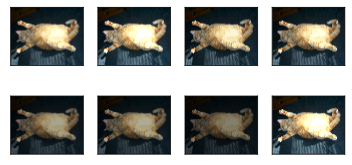

In [48]:
# 亮度
datagen = ImageDataGenerator(brightness_range=(0.5, 1.5))
apply(img, datagen)

### 9.1.1.3 叠加多个图像增广方法

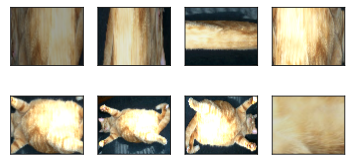

In [49]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=(0.1, 1),
    brightness_range=(0.5, 1.5))
apply(img, datagen)

## 9.1.2. 使用图像增广训练模型

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107f164e0>,
      dtype=object)

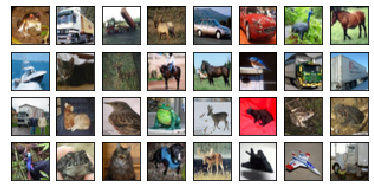

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_images(x_train[0:32], 4, 8, scale=0.8)

In [6]:

flip_aug = ImageDataGenerator(horizontal_flip=True)
no_aug = ImageDataGenerator()

In [7]:
def load_cifar10(is_train, augs, batch_size):
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    if is_train:
        return augs.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
    else:
        return augs.flow(x_test, y_test, batch_size=batch_size)
    

### 9.1.2.1 使用多GPU训练模型

In [8]:
def train_with_data_aug(train_augs, test_augs, lr=0.001):
    batch_size, net = 256, d2l.resnet18(10)
    net.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])
    
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    
    net.fit_generator(train_iter, epochs=10, steps_per_epoch=100)
    net.evaluate_generator(test_iter, epochs=10, steps_per_epoch=100)

In [ ]:
train_with_data_aug(flip_aug, no_aug)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
100/100 [==============================] - 379s 4s/step - loss: 1.6693 - acc: 0.3431
Epoch 2/10
  4/100 [>.............................] - ETA: 5:45 - loss: 1.3507 - acc: 0.4966